*NOTE David, we have prefaced any comments and questions directed to you with the word "NOTE", you will see this both in the text and code cells*

# 1. Project info

**Project title**: Identifying patterns in road accident data to reduce fatal traffic injuries

**Name:** Joel Ostblom, Rene Niehus

**E-mail:** joel.ostblom@gmail.com, rene.niehus777@gmail.com (not connected to datacamp)

**GitHub username**: [joelostblom](https://github.com/joelostblom) (also at [GitLab](https://gitlab.com/joelostblom))

**Link to prior writing**: [Five first lectures of a course in reproducible quantitative sciences at University of Toronto](https://uoftcoders.github.io/rcourse/) and [Using pandas instead of spreadsheet software](https://joelostblom.github.io/2017/04/10/from-spreadsheets-to-pandas.html)

**Short description**: Analyze road accident data of American drivers to understand similarities and differences between states and recommend a strategy to reduce fatal traffic injuries across the nation.


#### Long description ####

While the rate of fatal road accidents rate have been decreasing steadily since the 80's, the past 10 years have seen a stagnation in this reduction. Coupled with the increase number of miles driven in the nation, the total number of traffic related fatalities has now reached a 10 year high and is rapidly increasing.

![](./accident-history.png)

You work in the analytics unit for the US Department of Transportation and your team is currently investigating how to derive a strategy to reduce the incidence of road accidents across the nation. By looking at the demographics of traffic accident victims for each US state, you learn that there is a lot of variation between states. You want to understand if there are patterns in this variation in order to derive suggestions for an action plan. In particular, the question is: Should that plan be nation-wise, state-specific, or should it focus on regions of similar states? You want to back-up your recommendations with graphs and summary statistics. To accomplish these tasks, you need familiarity with data wrangling in pandas, plotting with seaborn and matplotlib, and use of dimensionality reduction (PCA) and unsuperised clustering (KMeans) via scikit-learn. 

#### Datasets used ####

The data for this project was originally collected by the National Highway Traffic Safety Administration and the National Association of Insurance Commissioners. This particular dataset was compiled and [released as a CSV-file](https://github.com/fivethirtyeight/data/tree/master/bad-drivers) by FiveThirytEight [under the CC-BY4.0 license](https://github.com/fivethirtyeight/data). We have modified the data to make it more suitable for this project, including changing column names and field separator, and the addition of comments.

#### Assumed student background ####
<!-- Add links to lessons on datacamp --> 

Students are expected to know how to

- Use shell commands in the Jupyter Notebook (`ls` and `head`).
- Use `pandas` to load and subset data with specific delimiters and comments, get a dataframe's shape and column data types, and compute summary statistics.
- Use `pairplot` in `seaborn`, including how to change settings for the diagonal axes.
- Use `plot` in `matplotlib` and loop logic to produce scree plots for identification of ideal clustering parameters. Also be able to do some basic plot beautification, such as changing labels and removing axes lines.
- Use dimensionality reduction (PCA) and unsupervised clustering (KMeans) techniques through `scikit-learn`.

# 2. Project narrative intro

## 1. Identify the data files and determine their format

The deadline for presenting your findings to the head of the department is tomorrow. You just received an email from your colleagues saying that they are now done preprocessing the data and uploaded it on the work server. Your colleagues excused themselves and said that they didn't have time to convert the data to the standard CSV-format, since they were in a rush to the airport. Now they are on a flight to a conference in New Zealand and you are stuck trying to figure out how to analyze this dataset.

This Jupyter Notebook is running on the same server as where the data was uploaded, use your knowledge of shell commands to figure out which directory you are in, what is the name of the file holding the data, and peak at the content of the file to understand what format the data is in.

In [1]:
# Check the name of the current directory to know that you are in the right place
current_dir = !pwd
!pwd

# List all files in this directory to see the name of the main data file
file_list = !ls
!ls

# It is helpful to create an overview of the hierarchical tree-like direcoty structure and files in subdirectories 
file_tree = !tree
!tree

# Study the first 20 lines of this file to understand how to read it in as a dataframe in the next cell
accidents_head = !head data/road-accidents.csv -n 20
accidents_head
# NOTE Technically, students could use `file.readlines()` in a loop to arrive at the same solution

/home/joel/proj/jarl-ds/datacamp-projects/road-accidents
Untitled.ipynb	      notebook.tex     output_24_1.png
Untitled1.ipynb       output_13_1.png  output_7_1.png
Untitled2.ipynb       output_15_1.png  output_8_1.png
accident-history.png  output_16_1.png  output_9_1.png
car-accidents.ipynb   output_17_1.png  python_project_spec.ipynb
data		      output_22_1.png
.
├── Untitled.ipynb
├── Untitled1.ipynb
├── Untitled2.ipynb
├── accident-history.png
├── car-accidents.ipynb
├── data
│   └── road-accidents.csv
├── notebook.tex
├── output_13_1.png
├── output_15_1.png
├── output_16_1.png
├── output_17_1.png
├── output_22_1.png
├── output_24_1.png
├── output_7_1.png
├── output_8_1.png
├── output_9_1.png
└── python_project_spec.ipynb

1 directory, 17 files


['##### LICENSE #####',
 '# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)',
 '# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)',
 '##### COLUMN ABBREVIATIONS #####',
 '# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)',
 '# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)',
 '# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)',
 '# perc_fatl_not_distr = Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted (2011)',
 '# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)',
 '# car_ins_prem = Car Insurance Premiums ($)',
 '# loss_per_driver = Losses incurred by insurance companies for collisions per insured driver ($)',
 '##### D

## 2. Read in and get an overview of the data

After peaking at the beginning of the file, you can now figure out the data format and which parameters you need to specify to read this into Python as a dataframe. After loading the file, the next step is to orient yourself and get an idea of how much and what kind of data you are dealing with.

In [2]:
# Read in as a dataframe using pandas
import pandas as pd
car_acc = pd.read_csv('data/road-accidents.csv', comment='#', sep='|')

# Save the number of rows columns as a tuple
rows_and_cols = car_acc.shape

# Save an overview of the data frame and print it
# This should include the number of rows and columns, the column data names and data types
car_acc_information = car_acc.info()
print(car_acc_information)

# Now display the last five rows of the data frame. Compare the column data types from above with this output,
# does it make sense? A quick data type sanity check like this can save you major headaches down the line.
car_acc.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
state                   51 non-null object
drvr_fatl_col_bmiles    51 non-null float64
perc_fatl_speed         51 non-null int64
perc_fatl_alcohol       51 non-null int64
perc_fatl_not_distr     51 non-null int64
perc_fatl_1st_time      51 non-null int64
car_ins_prem            51 non-null float64
loss_per_driver         51 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_not_distr,perc_fatl_1st_time,car_ins_prem,loss_per_driver
46,Virginia,12.7,19,27,87,88,768.95,153.72
47,Washington,10.6,42,33,82,86,890.03,111.62
48,West Virginia,23.8,34,28,97,87,992.61,152.56
49,Wisconsin,13.8,36,33,39,84,670.31,106.62
50,Wyoming,17.4,42,32,81,90,791.14,122.04


Before moving on to the next task, recall your main objective. Which question(s) are you hoping to shed light on with your analysis? What do you want to learn by exploring this data and what do you think is outside the scope of this analysis? This objective might change as you become increasingly familiar with the data, but it is helpful to keep it in mind as you start your exploratory data anlysis.

## 3. Create a textual and a graphical summary of the data

You now have an idea of what your dataset looks like. Next, to further familiarize yourself with this dataset, you wish to calculate summary statistics and produce a graphical overview of the data. The graphical overview is good to give you a sense for the distribution of the data, and could consist of one histogram per column. However, it is often a good idea to also explore the pairwise relationsship between the columns in the data set by using a using pairwise scatterplots (sometimes referred to as a "scatterplot matrix").

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_not_distr,perc_fatl_1st_time,car_ins_prem,loss_per_driver
count,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000
mean,15.790196,31.725490,30.686275,85.921569,88.72549,886.957647,134.493137
std,4.122002,9.633438,5.132213,15.158949,6.96011,178.296285,24.835922
min,5.900000,13.000000,16.000000,10.000000,76.00000,641.960000,82.750000
25%,12.750000,23.000000,28.000000,83.000000,83.50000,768.430000,114.645000
50%,15.600000,34.000000,30.000000,88.000000,88.00000,858.970000,136.050000
75%,18.500000,38.000000,33.000000,95.000000,95.00000,1007.945000,151.870000
max,23.900000,54.000000,44.000000,100.000000,100.00000,1301.520000,194.780000


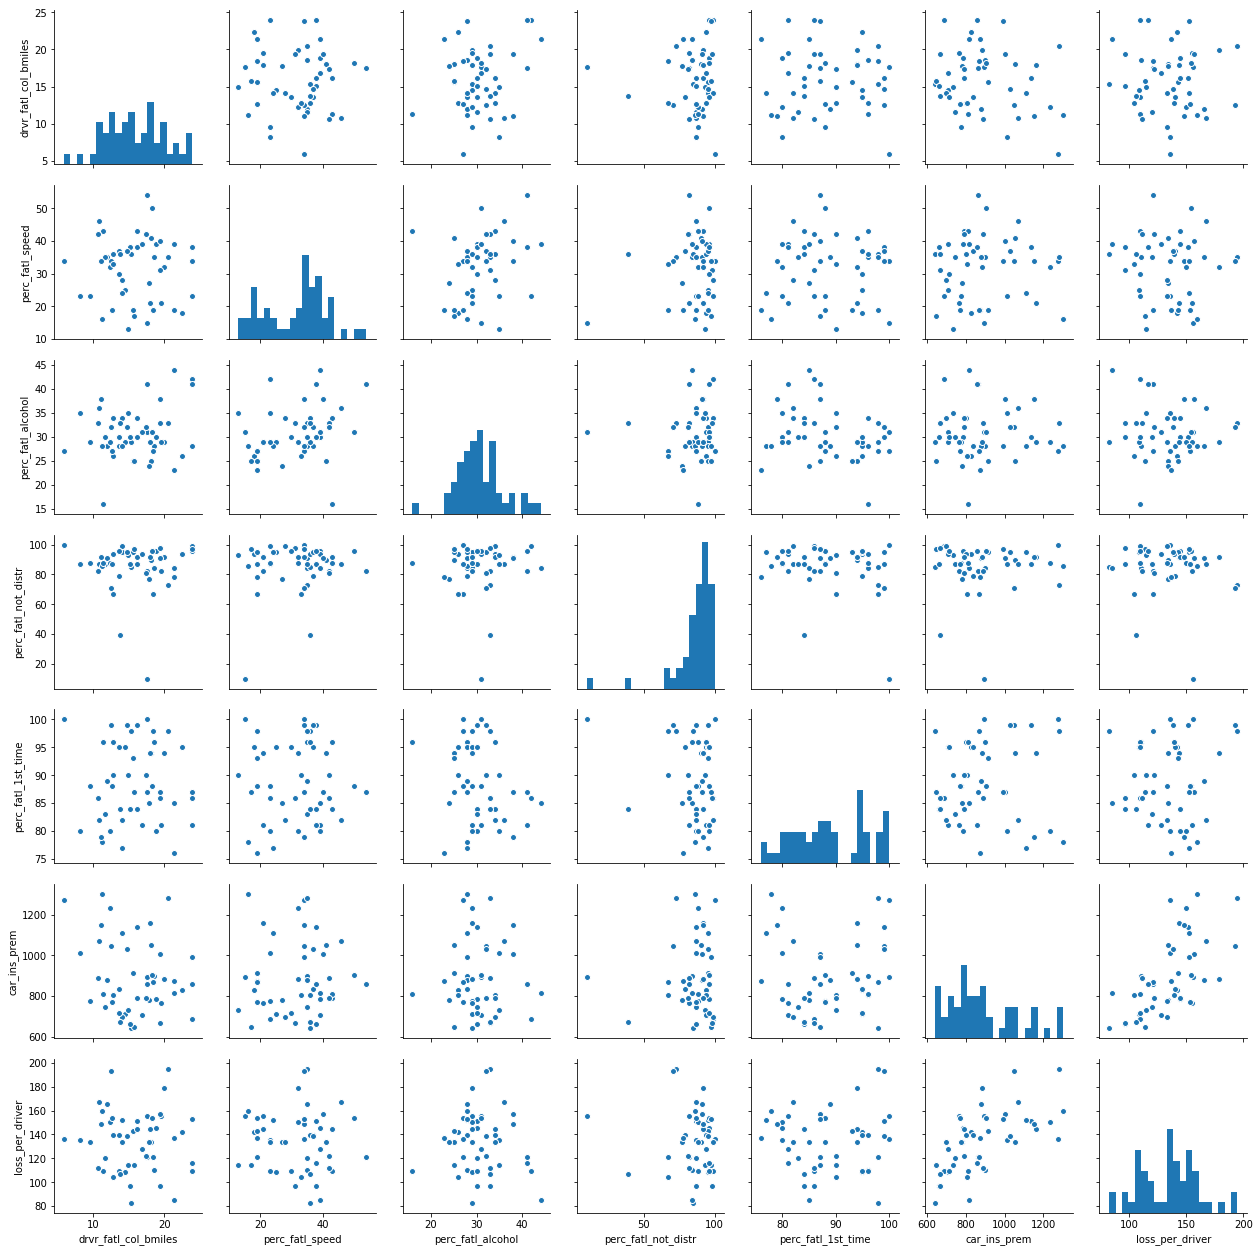

In [4]:
import seaborn as sns

# This makes plots appear in the notebook
%matplotlib inline

# Create a pairwise scatterplot. Set the histograms on the diagonal to have 20 bins each
sns.pairplot(car_acc, diag_kws={'bins':20})

# Finally, produce summary statistics of all columns in the data frame
car_acc.describe()
# You could use `pd.set_option('display.precision', 1)` to reduce the number of displayed decimals

Pause and ask what you see in this plot and if it makes sense. What does it mean when the cloud of data points indicates a correlation? Write down precise statements of what you think the data tells you, such as "In states where a larger proportion of fatal driving accidents are alcohol related, more drivers also tend to have been speeding at the time of the accident." Remember that this plot only displays correlations between variables, you cannot determine if these relationships are causative, but they might give a good indication of what to look closer at.

It is easy to get lost in techniques, settings and code-optimisation. To remain focused, remind yourself of the main objective that you thought about before by looking at your post-it note, then let's dig deeper into the data!

---

# R instructions and code

*NOTE Only the differences from the Python instructions are included below*

** Long description** *Last sentence will be changed to:* To accomplish these tasks, you need familiarity with data wrangling in tidyverse, plotting with ggplot2, and use of dimensionality reduction (PCA) and unsupervised clustering (Kmeans)

#### Assumed student background ####
Students are expected to know how to

- Use shell commands in the Jupyter Notebook (`ls` and `head`).
- Use `tidyverse` to load and subset data with specific delimiters and comments, get a dataframe's shape and column data types, to gather a dataframe,  compute summary statistics.
- Use `ggplot2`.
- Use dimensionality reduction (PCA) with `prcomp` and Kmeans unsupervised clustering through `kmeans`.

## 1. Identify the data files and determine their format

*NOTE The issue here is that the commands necessary for listing and peaking at files in a local folder are not taught in any of the lectures (at least we could not find it). We suggest to use one of the following two approaches:*

*1. Give students the syntax for how they can use shell commands from Jupyter Notebooks running R (`system("<command>", intern=TRUE`) and then ask them to use their knowledge from the shell lecture to put in the right command (this is more similar to the Python approach and gives access to all shell commands, but might have differences if run on different OSes).*

*2. Give students the name of the R-specific commands (since they are not introduced during the lectures) and ask them to use `?` to figure out which command does what and how to use them (this might be the more conventional approach to those tasks)*

*Both approaches are shown below and suffixed with the approach number*

In [2]:
# Check the name of the current directory to know that you are in the right place
current_dir <- system("pwd", intern=TRUE) #1
current_dir <- getwd() #2
print(current_dir)

# List all files in this directory to see the name of the main data file
file_list <- system("ls", intern=TRUE) #1
file_list <- list.files() #2
print(file_list)

# NOTE Not including "tree" becaue the output looks rather unintuitive when read into an R vector
# List the content of the "data" directory
file_list <- system("ls data", intern=TRUE) #1
file_list <- list.files("data") #2
print(file_list)

# Study the first 20 lines of this file to understand how to read it in as a dataframe in the next cell
# Since the output is a vector of lines, there might not be one line per row in the output.
accidents_head <- system("head data/road-accidents.csv -n 20", intern=TRUE) #1
accidents_head <- readLines('data/road-accidents.csv', n=20) #2
accidents_head

[1] "/home/joel/proj/jarl-ds/datacamp-projects/road-accidents"
 [1] "Untitled.ipynb"            "Untitled1.ipynb"          
 [3] "Untitled2.ipynb"           "accident-history.png"     
 [5] "car-accidents.ipynb"       "data"                     
 [7] "notebook.tex"              "output_13_1.png"          
 [9] "output_15_1.png"           "output_16_1.png"          
[11] "output_17_1.png"           "output_22_1.png"          
[13] "output_24_1.png"           "output_7_1.png"           
[15] "output_8_1.png"            "output_9_1.png"           
[17] "python_project_spec.ipynb"
[1] "road-accidents.csv"


[1] "##### LICENSE #####"                                                                                                                 
 [2] "# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)"  
 [3] "# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)"                                                 
 [4] "##### COLUMN ABBREVIATIONS #####"                                                                                                    
 [5] "# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)"                                    
 [6] "# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)"                                     
 [7] "# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)"                           
 [8] "# perc_fatl_not_distr = Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted (2011)"                           
 [9] "# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)"
[10] "# car_ins_prem = Car Insurance Premiums ($)"                                                                                         
[11] "# loss_per_driver = Losses incurred by insurance companies for collisions per insured driver ($)"                                    
[12] "##### DATA BEGIN #####"                                                                                                              
[13] "state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_not_distr|perc_fatl_1st_time|car_ins_prem|loss_per_driver"    
[14] "Alabama|18.8|39|30|96|80|784.55|145.08"                                                                                              
[15] "Alaska|18.1|41|25|90|94|1053.48|133.93"                                                                                              
[16] "Arizona|18.6|35|28|84|96|899.47|110.35"                                                                                              
[17] "Arkansas|22.4|18|26|94|95|827.34|142.39"                                                                                             
[18] "California|12|35|28|91|89|878.41|165.63"                                                                                             
[19] "Colorado|13.6|37|28|79|95|835.5|139.91"                                                                                              
[20] "Connecticut|10.8|46|36|87|82|1068.73|167.02"

## 2. Read in and get an overview of the data

In [4]:
# Read in as a dataframe using tidyverse
library(tidyverse)
car_acc <- read_delim(file = 'data/road-accidents.csv', comment = '#', delim = '|')

# Save the number of rows columns as a vector
rows_and_cols <- dim(car_acc)

# Save an overview of the data frame and print it
# This overview should include the number of rows and columns, the column data names and data types
car_acc_structure <- str(car_acc)
print(car_acc_structure)

# Now display the last six rows of the data frame. Compare the column data types from previosuly with this output,
# does it make sense? A quick data type sanity check like this can save you major headaches down the line.
tail(car_acc)

Parsed with column specification:
cols(
  state = col_character(),
  drvr_fatl_col_bmiles = col_double(),
  perc_fatl_speed = col_integer(),
  perc_fatl_alcohol = col_integer(),
  perc_fatl_not_distr = col_integer(),
  perc_fatl_1st_time = col_integer(),
  car_ins_prem = col_double(),
  loss_per_driver = col_double()
)


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	51 obs. of  8 variables:
 $ state               : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ drvr_fatl_col_bmiles: num  18.8 18.1 18.6 22.4 12 13.6 10.8 16.2 5.9 17.9 ...
 $ perc_fatl_speed     : int  39 41 35 18 35 37 46 38 34 21 ...
 $ perc_fatl_alcohol   : int  30 25 28 26 28 28 36 30 27 29 ...
 $ perc_fatl_not_distr : int  96 90 84 94 91 79 87 87 100 92 ...
 $ perc_fatl_1st_time  : int  80 94 96 95 89 95 82 99 100 94 ...
 $ car_ins_prem        : num  785 1053 899 827 878 ...
 $ loss_per_driver     : num  145 134 110 142 166 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 8
  .. ..$ state               : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ drvr_fatl_col_bmiles: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ perc_fatl_speed     : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ perc_fatl_alcohol   : list()
  ..

state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_not_distr,perc_fatl_1st_time,car_ins_prem,loss_per_driver
Vermont,13.6,30,30,96,95,716.20,109.61
Virginia,12.7,19,27,87,88,768.95,153.72
Washington,10.6,42,33,82,86,890.03,111.62
West Virginia,23.8,34,28,97,87,992.61,152.56
Wisconsin,13.8,36,33,39,84,670.31,106.62
Wyoming,17.4,42,32,81,90,791.14,122.04


## 3. Create a textual and a graphical summary of the data

*NOTE The histograms are excluded here since it was not taught during the lessons and is not completely straightforward to include (requires reshape and facet_wrap, loop, custom functions, or a package such as psych)*

    state           drvr_fatl_col_bmiles perc_fatl_speed perc_fatl_alcohol
 Length:51          Min.   : 5.90        Min.   :13.00   Min.   :16.00    
 Class :character   1st Qu.:12.75        1st Qu.:23.00   1st Qu.:28.00    
 Mode  :character   Median :15.60        Median :34.00   Median :30.00    
                    Mean   :15.79        Mean   :31.73   Mean   :30.69    
                    3rd Qu.:18.50        3rd Qu.:38.00   3rd Qu.:33.00    
                    Max.   :23.90        Max.   :54.00   Max.   :44.00    
 perc_fatl_not_distr perc_fatl_1st_time  car_ins_prem    loss_per_driver 
 Min.   : 10.00      Min.   : 76.00     Min.   : 642.0   Min.   : 82.75  
 1st Qu.: 83.00      1st Qu.: 83.50     1st Qu.: 768.4   1st Qu.:114.64  
 Median : 88.00      Median : 88.00     Median : 859.0   Median :136.05  
 Mean   : 85.92      Mean   : 88.73     Mean   : 887.0   Mean   :134.49  
 3rd Qu.: 95.00      3rd Qu.: 95.00     3rd Qu.:1007.9   3rd Qu.:151.87  
 Max.   :100.00      Max.   :10

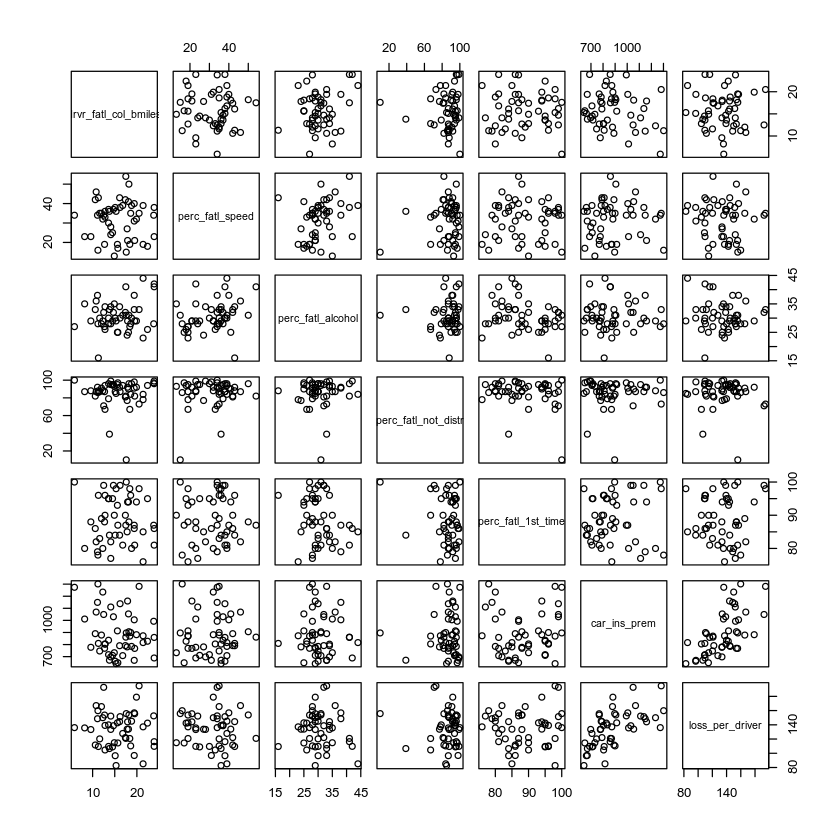

In [5]:
# Create a pairwise scatterplot to explore the data
car_acc %>% 
    select(-state) %>%
    plot()

# Produce summary statistics of all columns in the data frame and compare with the scatterplots
summary(car_acc)